# EDA - dataset UNSW-NB15

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Load the dataset

In [2]:
train_df = pd.read_csv("../datasets/UNSW-NB15/UNSW_NB15_training-set.csv")

# Creation of a bool column Attack (this will be done in the pipeline, as well as data cleaning and preprocessing)
train_df.rename(columns={'attack_cat': 'attack_type'}, inplace=True)
train_df.rename(columns={'label': 'attack'}, inplace=True)
train_df['attack'] = train_df['attack'].astype(bool)

# Drop useless columns (also this will be done in the pipeline)
train_df.drop(columns=['id'], inplace=True)

# Cast integer columns with min value 0 and max value 1 to bool (also this will be done in the pipeline)
columns_to_cast = [col for col in train_df.columns
                   if pd.api.types.is_integer_dtype(train_df[col]) and train_df[col].min() == 0 and train_df[col].max() == 1]
train_df[columns_to_cast] = train_df[columns_to_cast].astype(bool)

train_df.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_type,attack
0,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,False,Normal,False
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,False,Normal,False
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,False,Normal,False
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,False,Normal,False
4,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,False,Normal,False


In [3]:
train_df.shape

(175341, 44)

In [4]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
dur,175341.0,1.359389e+00,6.480249e+00,0.0,0.000008,0.001582,6.680690e-01,5.999999e+01
spkts,175341.0,2.029866e+01,1.368876e+02,1.0,2.000000,2.000000,1.200000e+01,9.616000e+03
dpkts,175341.0,1.896959e+01,1.102583e+02,0.0,0.000000,2.000000,1.000000e+01,1.097400e+04
sbytes,175341.0,8.844844e+03,1.747656e+05,28.0,114.000000,430.000000,1.418000e+03,1.296523e+07
dbytes,175341.0,1.492892e+04,1.436542e+05,0.0,0.000000,164.000000,1.102000e+03,1.465555e+07
rate,175341.0,9.540619e+04,1.654010e+05,0.0,32.786140,3225.806520,1.250000e+05,1.000000e+06
sttl,175341.0,1.795470e+02,1.029400e+02,0.0,62.000000,254.000000,2.540000e+02,2.550000e+02
dttl,175341.0,7.960957e+01,1.105069e+02,0.0,0.000000,29.000000,2.520000e+02,2.540000e+02
sload,175341.0,7.345403e+07,1.883574e+08,0.0,13053.338870,879674.750000,8.888889e+07,5.988000e+09
dload,175341.0,6.712056e+05,2.421312e+06,0.0,0.000000,1447.022705,2.784487e+04,2.242273e+07


## Data Cleaning Checks

### Missing Values

In [5]:
train_df.isnull().sum()

dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_type          0
attack     

### Duplicate Rows

In [6]:
train_df[train_df.duplicated()].head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_type,attack
66,50.004398,ospf,-,INT,6,0,384,0,0.099991,1,0,5.119550e+01,0.0000,0,0,10000.880,0.000,0.0,0.0,0,0,0,0,0.0,0.0,0.0,64,0,0,0,2,0,2,1,2,1,0,0,0,1,2,False,Normal,False
169,0.000011,udp,-,INT,2,0,2120,0,90909.090200,254,0,7.709091e+08,0.0000,0,0,0.011,0.000,0.0,0.0,0,0,0,0,0.0,0.0,0.0,1060,0,0,0,63,2,7,7,2,63,0,0,0,8,62,False,Normal,False
214,0.001146,udp,dns,CON,2,2,146,178,2617.801058,31,29,5.095986e+05,621291.4375,0,0,0.009,0.006,0.0,0.0,0,0,0,0,0.0,0.0,0.0,73,89,0,0,9,0,2,2,2,3,0,0,0,2,8,False,Normal,False
313,0.001098,udp,dns,CON,2,2,132,164,2732.240490,31,29,4.808743e+05,597449.9375,0,0,0.010,0.008,0.0,0.0,0,0,0,0,0.0,0.0,0.0,66,82,0,0,5,0,5,3,2,3,0,0,0,3,12,False,Normal,False
347,0.001088,udp,dns,CON,2,2,130,162,2757.352893,31,29,4.779412e+05,595588.2500,0,0,0.009,0.006,0.0,0.0,0,0,0,0,0.0,0.0,0.0,65,81,0,0,2,0,2,2,2,2,0,0,0,2,2,False,Normal,False


In [7]:
# Exclude duplicate rows from train_data (also this will be done in the pipeline)
train_df = train_df[~train_df.duplicated()]

In [8]:
train_df.shape

(107740, 44)

## EDA

### Univariate Analysis

For each non-numerical column, show the values and plot the distribution

Column proto
------------------------------
Unique Values (133): ['tcp' 'udp' 'arp' 'ospf' 'icmp' 'igmp' 'rtp' 'ddp' 'ipv6-frag' 'cftp'
 'wsn' 'pvp' 'wb-expak' 'mtp' 'pri-enc' 'sat-mon' 'cphb' 'sun-nd' 'iso-ip'
 'xtp' 'il' 'unas' 'mfe-nsp' '3pc' 'ipv6-route' 'idrp' 'bna' 'swipe'
 'kryptolan' 'cpnx' 'rsvp' 'wb-mon' 'vmtp' 'ib' 'dgp' 'eigrp' 'ax.25'
 'gmtp' 'pnni' 'sep' 'pgm' 'idpr-cmtp' 'zero' 'rvd' 'mobile' 'narp' 'fc'
 'pipe' 'ipcomp' 'ipv6-no' 'sat-expak' 'ipv6-opts' 'snp' 'ipcv'
 'br-sat-mon' 'ttp' 'tcf' 'nsfnet-igp' 'sprite-rpc' 'aes-sp3-d' 'sccopmce'
 'sctp' 'qnx' 'scps' 'etherip' 'aris' 'pim' 'compaq-peer' 'vrrp' 'iatp'
 'stp' 'l2tp' 'srp' 'sm' 'isis' 'smp' 'fire' 'ptp' 'crtp' 'sps'
 'merit-inp' 'idpr' 'skip' 'any' 'larp' 'ipip' 'micp' 'encap' 'ifmp'
 'tp++' 'a/n' 'ipv6' 'i-nlsp' 'ipx-n-ip' 'sdrp' 'tlsp' 'gre' 'mhrp' 'ddx'
 'ippc' 'visa' 'secure-vmtp' 'uti' 'vines' 'crudp' 'iplt' 'ggp' 'ip'
 'ipnip' 'st2' 'argus' 'bbn-rcc' 'egp' 'emcon' 'igp' 'nvp' 'pup' 'xnet'
 'chaos' 'mux' 'dc

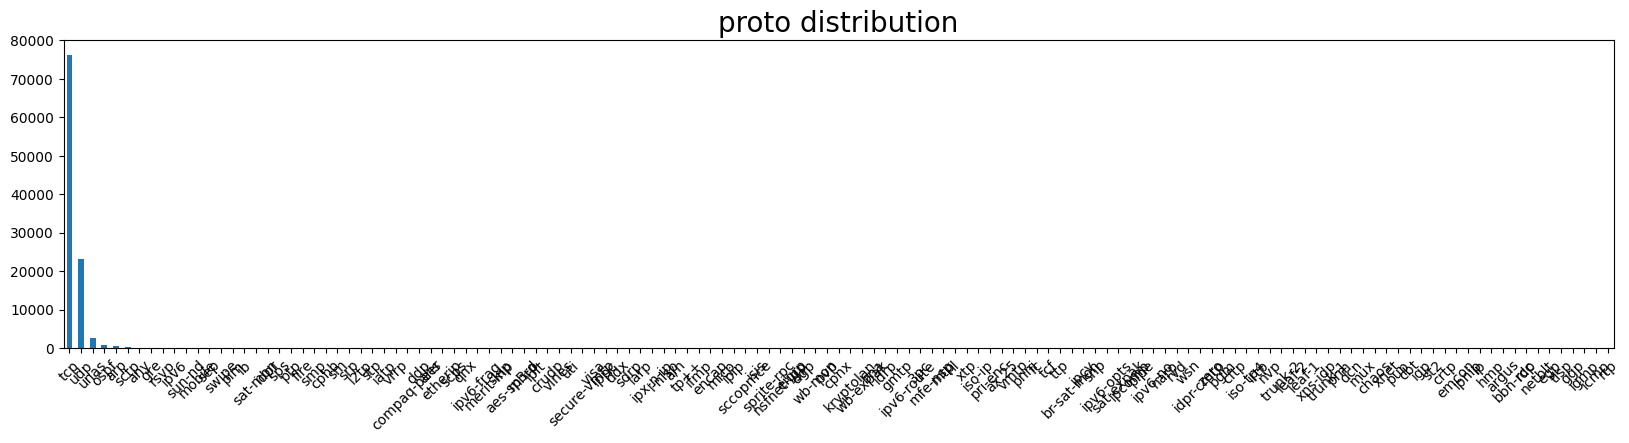

Column service
------------------------------
Unique Values (13): ['-' 'ftp' 'smtp' 'snmp' 'http' 'ftp-data' 'dns' 'ssh' 'radius' 'pop3'
 'dhcp' 'ssl' 'irc']

Value Counts:
-           64951
http        18135
dns         11046
smtp         5025
ftp-data     3282
ftp          2691
ssh          1295
pop3         1104
snmp           63
ssl            56
dhcp           55
irc            25
radius         12
Name: service, dtype: int64



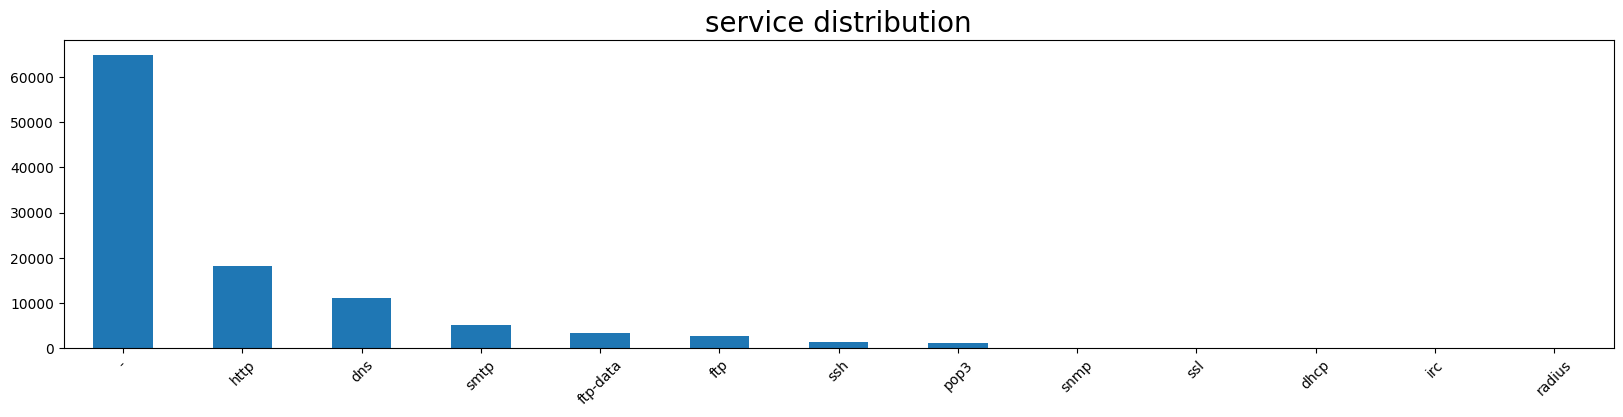

Column state
------------------------------
Unique Values (9): ['FIN' 'INT' 'CON' 'ECO' 'REQ' 'RST' 'PAR' 'URN' 'no']

Value Counts:
FIN    74478
INT    19726
CON    12487
REQ      953
RST       83
ECO       10
PAR        1
URN        1
no         1
Name: state, dtype: int64



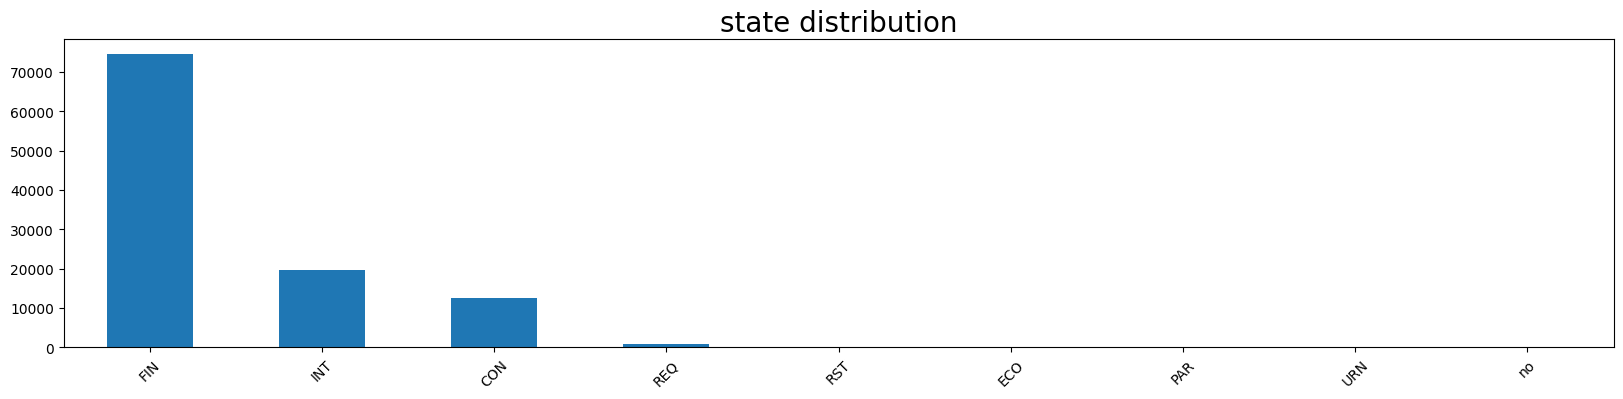

Column is_sm_ips_ports
------------------------------
Unique Values (2): [False  True]

Value Counts:
False    107195
True        545
Name: is_sm_ips_ports, dtype: int64



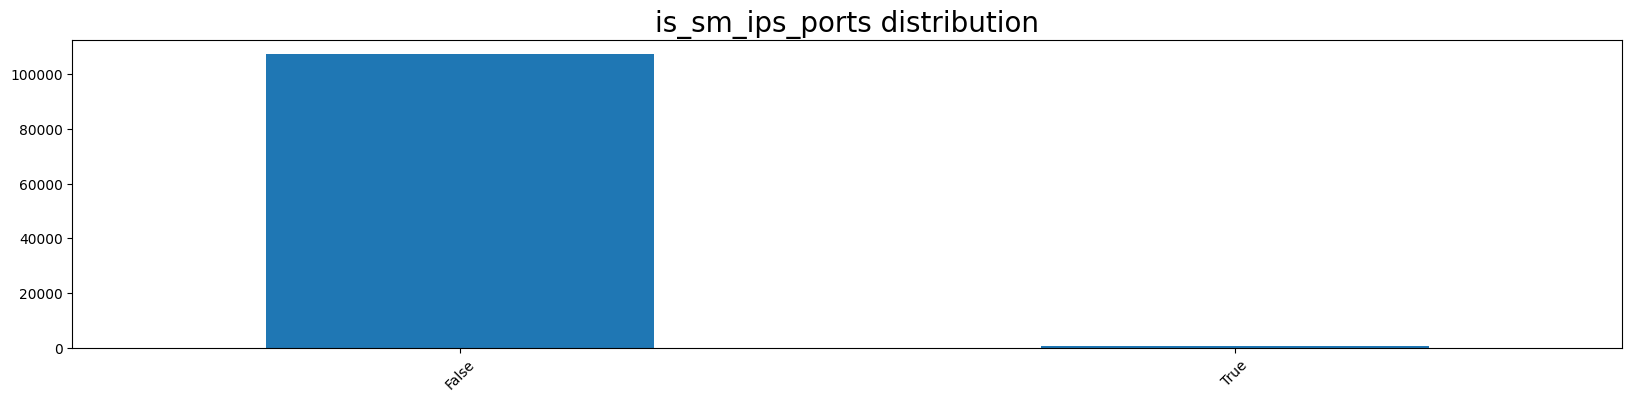

Column attack_type
------------------------------
Unique Values (10): ['Normal' 'Backdoor' 'Analysis' 'Fuzzers' 'Shellcode' 'Reconnaissance'
 'Exploits' 'DoS' 'Worms' 'Generic']

Value Counts:
Normal            51890
Exploits          19844
Fuzzers           16150
Reconnaissance     7522
Generic            4181
DoS                3806
Analysis           1594
Backdoor           1535
Shellcode          1091
Worms               127
Name: attack_type, dtype: int64



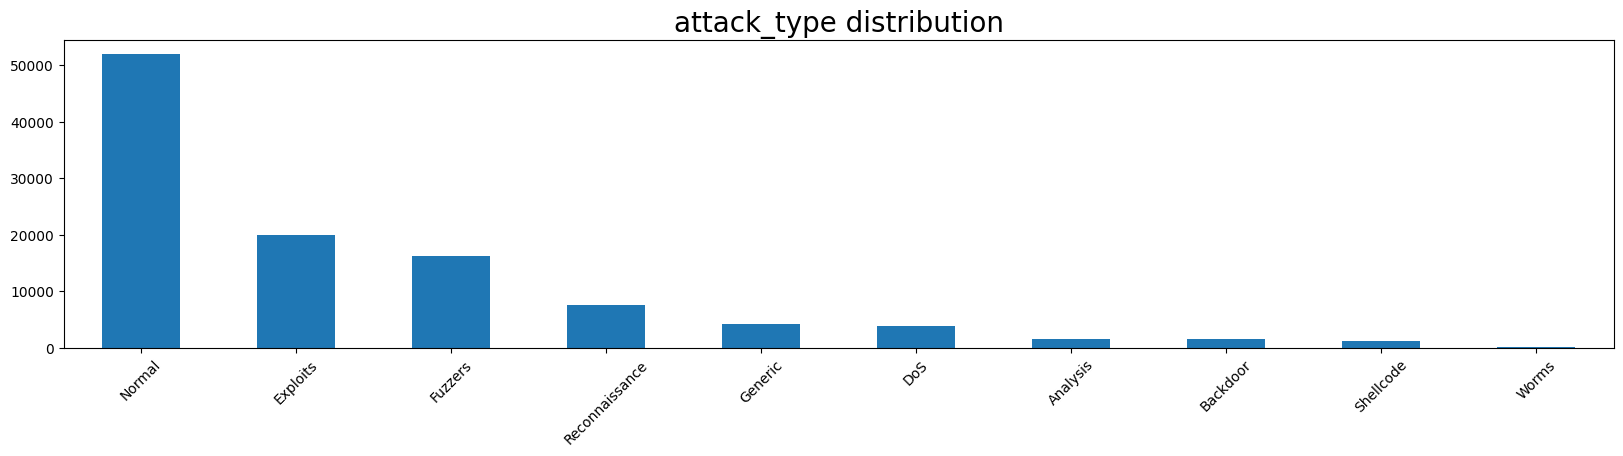

Column attack
------------------------------
Unique Values (2): [False  True]

Value Counts:
True     55850
False    51890
Name: attack, dtype: int64



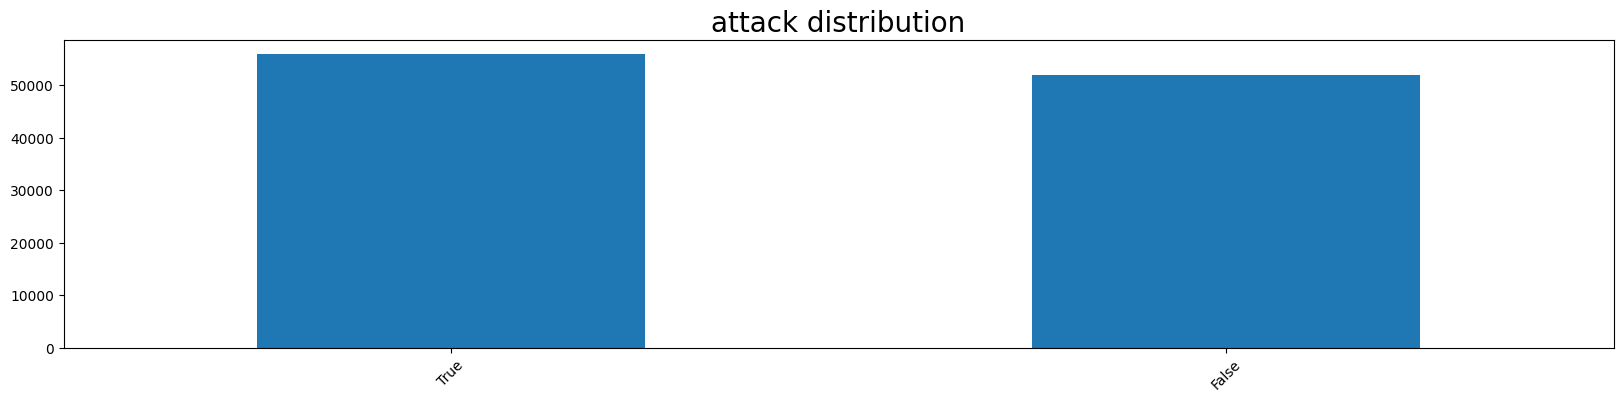

In [9]:
# Non-numerical columns
non_numerical_columns = train_df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

# Show the distribution for each one
for column_name in non_numerical_columns:
    print(f"Column {column_name}\n{'-'*30}")
    unique_vals = train_df[column_name].unique()
    value_counts = train_df[column_name].value_counts()
    print(f"Unique Values ({len(unique_vals)}): {unique_vals}\n")
    print(f"Value Counts:\n{value_counts}\n{'='*40}\n")
    plt.figure(figsize=(20,4))
    value_counts.plot(kind="bar")
    plt.title(f"{column_name} distribution", fontsize=20)
    plt.xticks(rotation=45)
    plt.show()

Violin plot for each numerical feature

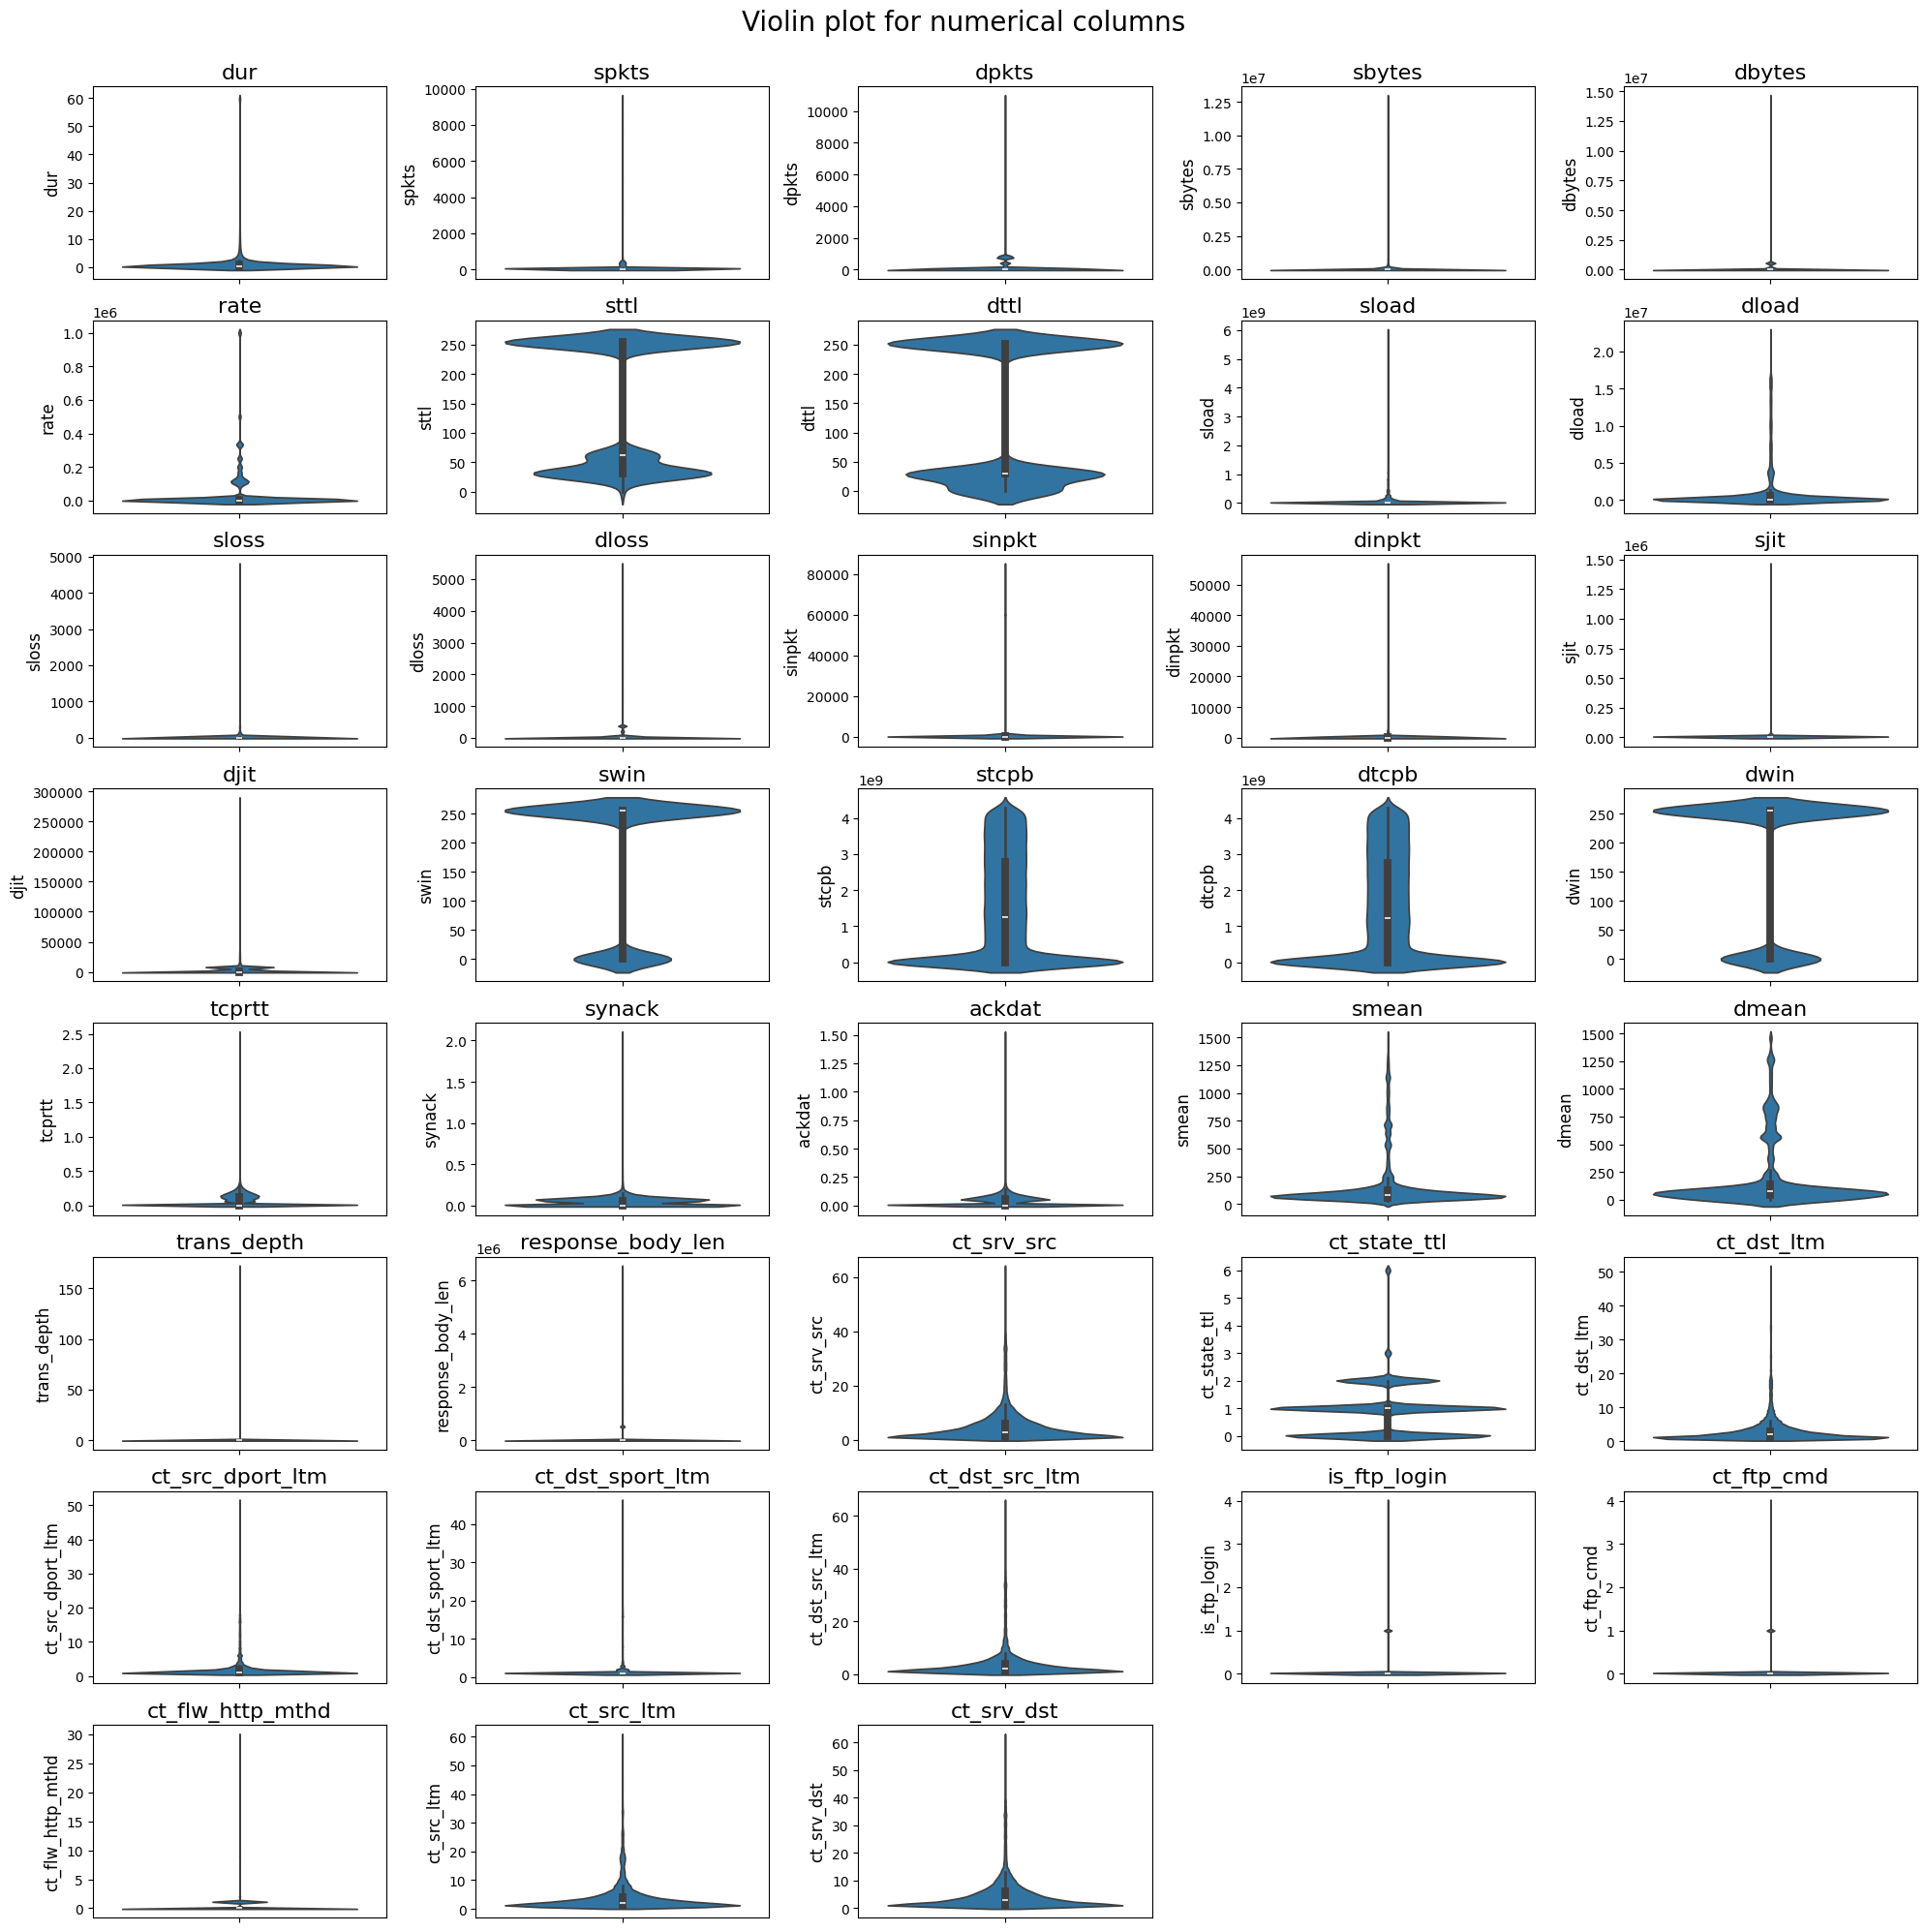

In [10]:
# Numerical columns
numerical_columns = train_df.select_dtypes(exclude=['object', 'category', 'bool']).columns.tolist()

# Create subplots for violin plots
fig, axes = plt.subplots(16, 5, figsize=(20, 40))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Generate a violin plot for each numerical column
for i, col in enumerate(numerical_columns):
    sns.violinplot(data=train_df, y=col, ax=axes[i])
    axes[i].set_title(col, fontsize=16)
    axes[i].set_xlabel('')
    axes[i].set_ylabel(col, fontsize=12)

# Remove any extra subplots
for j in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Violin plot for numerical columns', fontsize=20)
plt.subplots_adjust(top=0.96)
plt.show()

Semi-log histogram for each numerical feature

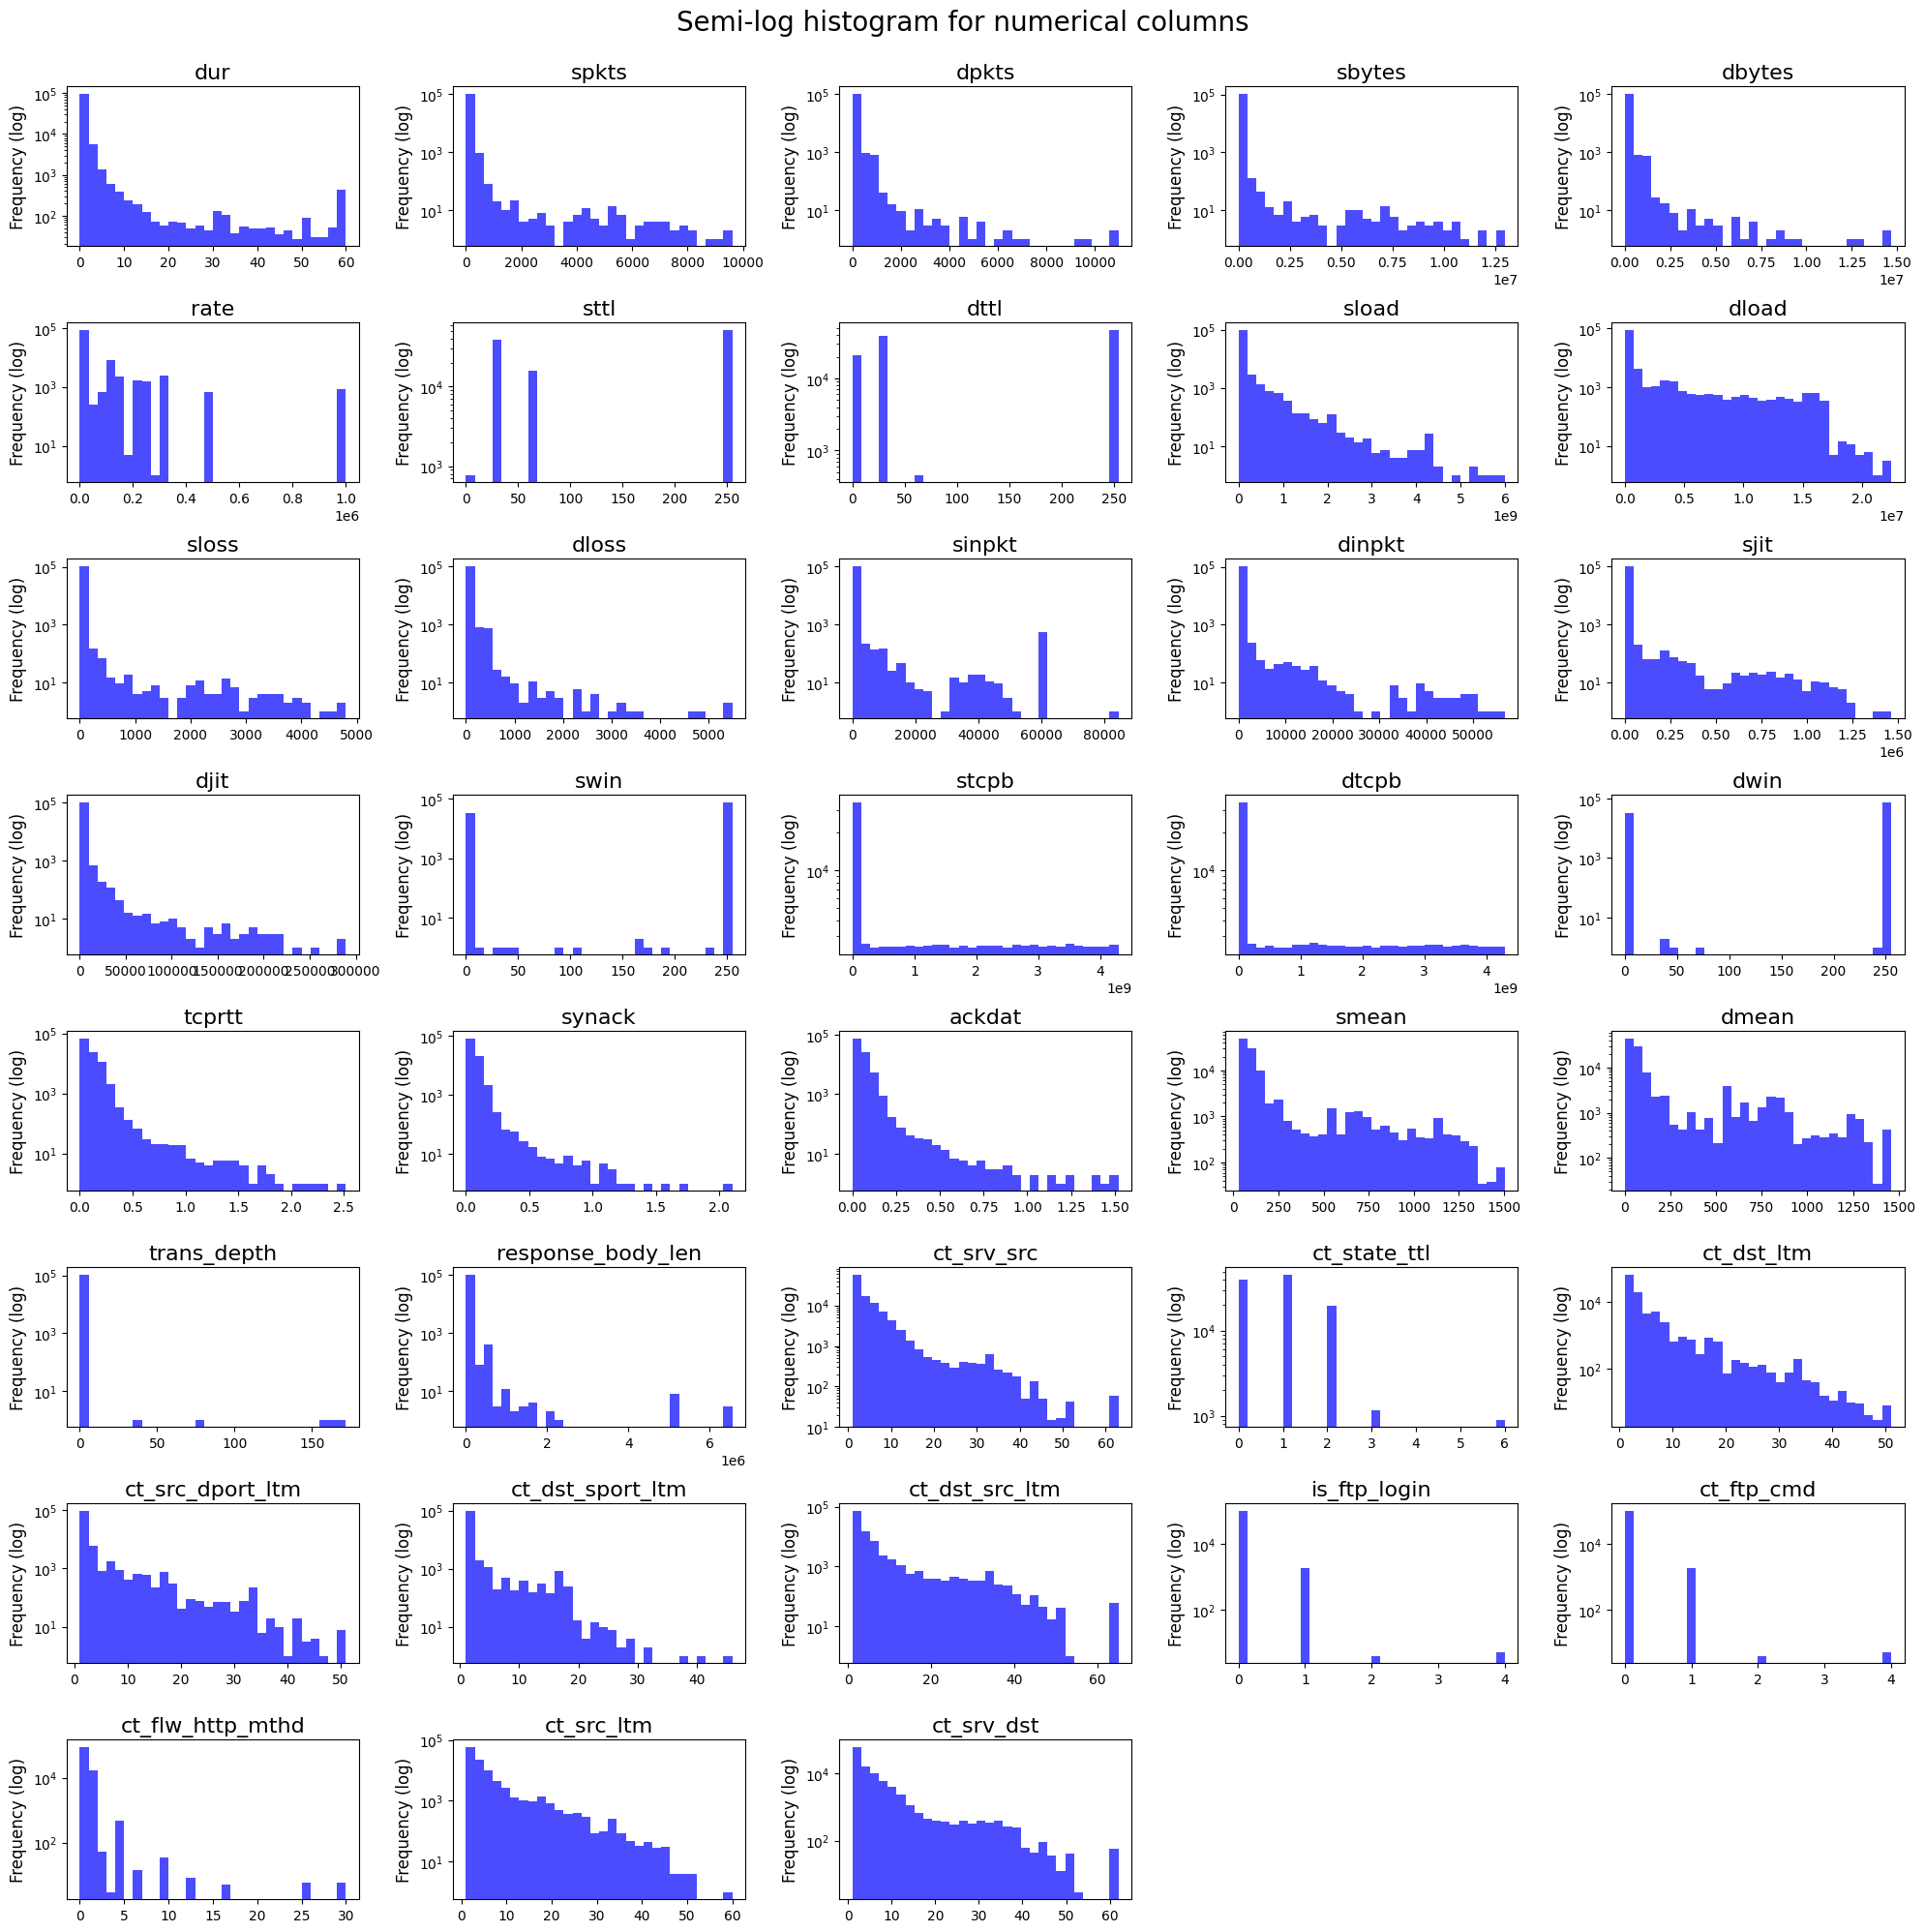

In [11]:
# Create subplots for semi-log histograms
fig, axes = plt.subplots(16, 5, figsize=(20, 40))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Generate a semi-log histogram for each numerical column
for i, col in enumerate(numerical_columns):
    axes[i].hist(train_df[col], bins=30, log=True, color='blue', alpha=0.7)
    axes[i].set_title(col, fontsize=16)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency (log)', fontsize=12)

# Remove any extra subplots
for j in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Semi-log histogram for numerical columns', fontsize=20)
plt.subplots_adjust(top=0.96)
plt.show()

Plot the distributions of Attack and Attack Types with percentages

In [12]:
def plot_distribution_with_percentages(col_name):
    plt.figure(figsize=(20, 8))
    ax = sns.countplot(data=train_df, x=col_name, hue=col_name, legend=False)
    total = len(train_df)
    for p in ax.patches:
        count = int(p.get_height())
        percentage = 100 * count / total
        if percentage > 0:
            ax.annotate(f'{count} ({percentage:.1f}%)', (p.get_x() + p.get_width() / 2., p.get_height() * 0.985), 
                    ha='center', va='baseline', fontsize=8, color='black', xytext=(0, 5), 
                    textcoords='offset points')

    plt.title(f"Distribution of {col_name} with percentages", fontsize=20)
    plt.xlabel(col_name)
    plt.ylabel("Count")
    plt.show()

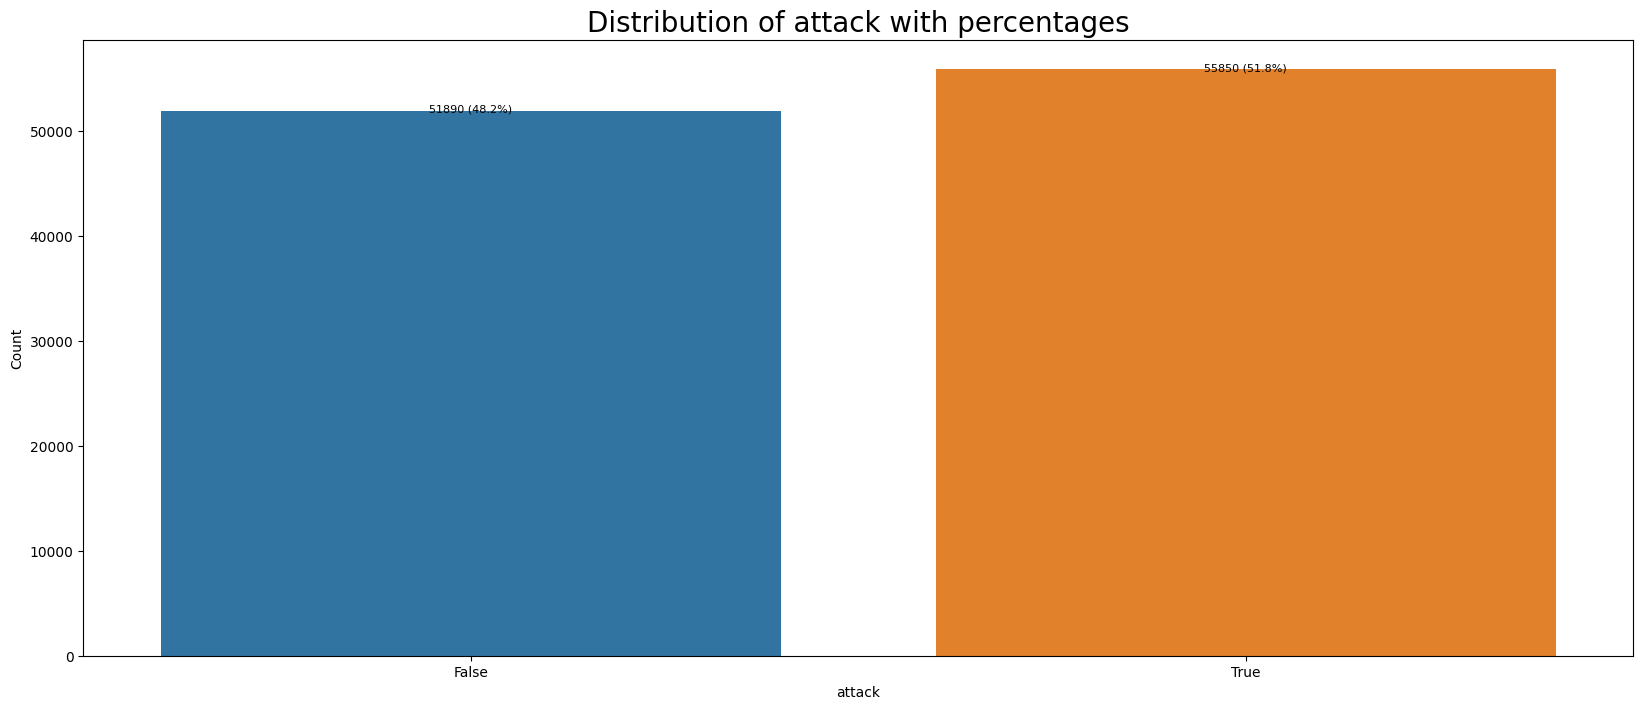

In [13]:
# Distribution of Attack with percentages
plot_distribution_with_percentages('attack')

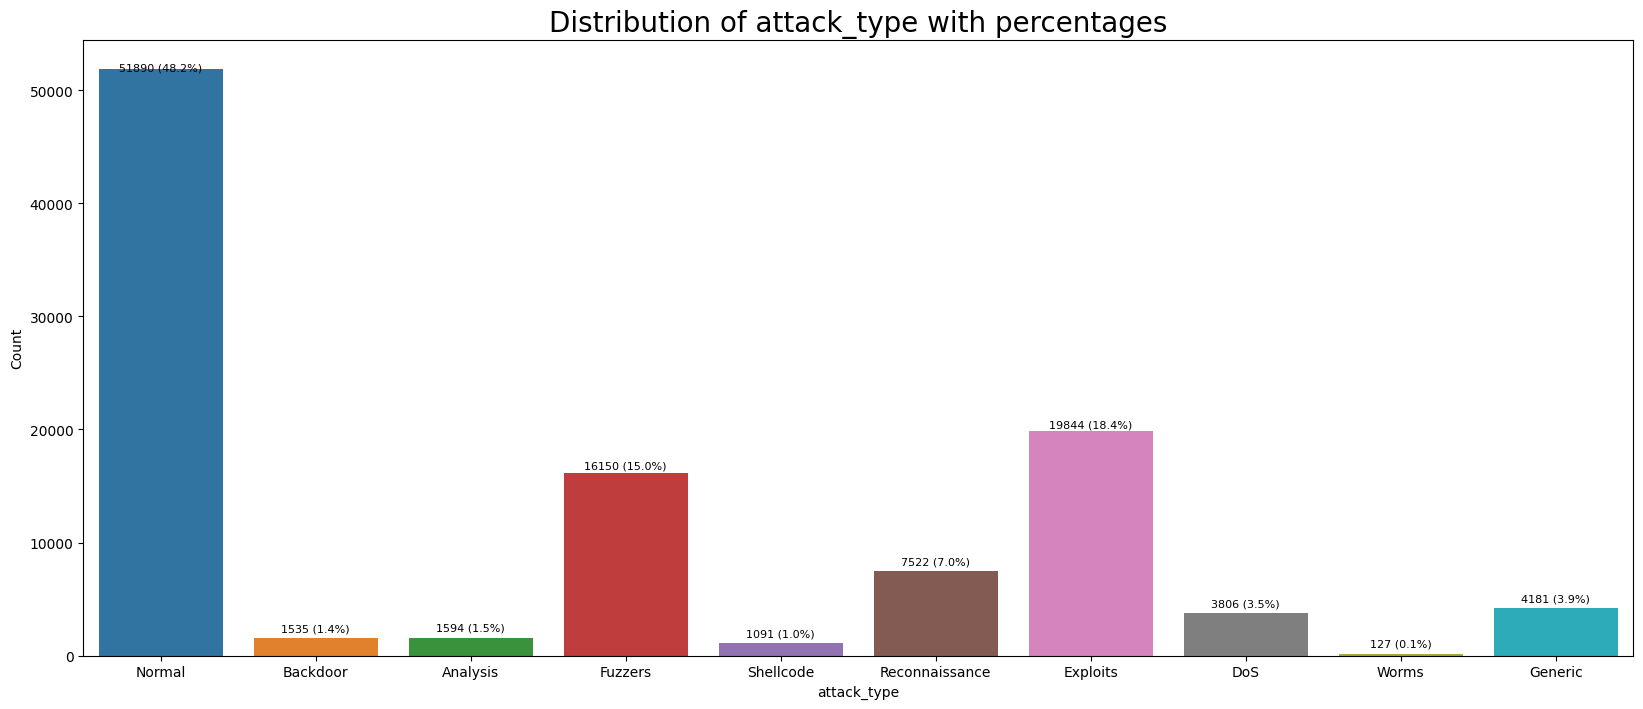

In [14]:
# Distribution of Attack Type with percentages
plot_distribution_with_percentages('attack_type')

### Covariate Analysis

In [15]:
# Compare column vs column
def hist_col_vs_col(col1, col2, top_n=10):
    # Get the top N categories by count in col2, to avoid a huge plot
    top_categories = train_df[col2].value_counts().head(top_n).index
    filtered_df = train_df[train_df[col2].isin(top_categories)]
    
    # Set dynamic title
    title_suffix = f" (top {top_n} for {col2})" if train_df[col2].nunique() > top_n else ""
    title = f'{col1} vs {col2}{title_suffix}'
    
    plt.figure(figsize=(20, 8))
    sns.countplot(x=col1, data=filtered_df, hue=col2, palette=sns.color_palette("dark", as_cmap=False, n_colors=filtered_df[col2].nunique()))
    plt.xticks(rotation=45)
    plt.title(title, fontsize=20)
    plt.legend(title=col2)
    plt.show()

Compare Attack vs Protocol

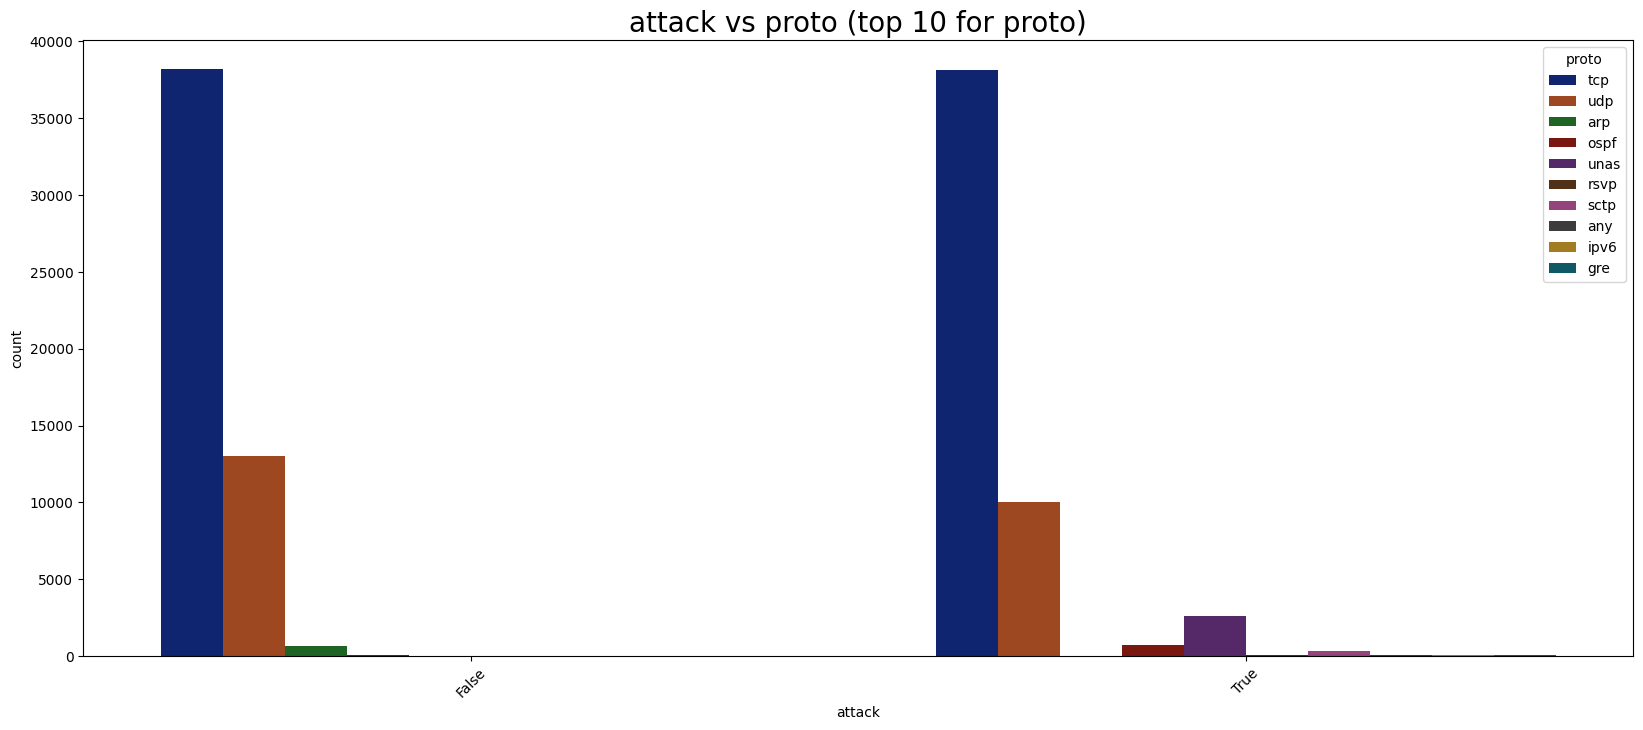

In [16]:
hist_col_vs_col('attack', 'proto')

Compare Attack Type vs Protocol

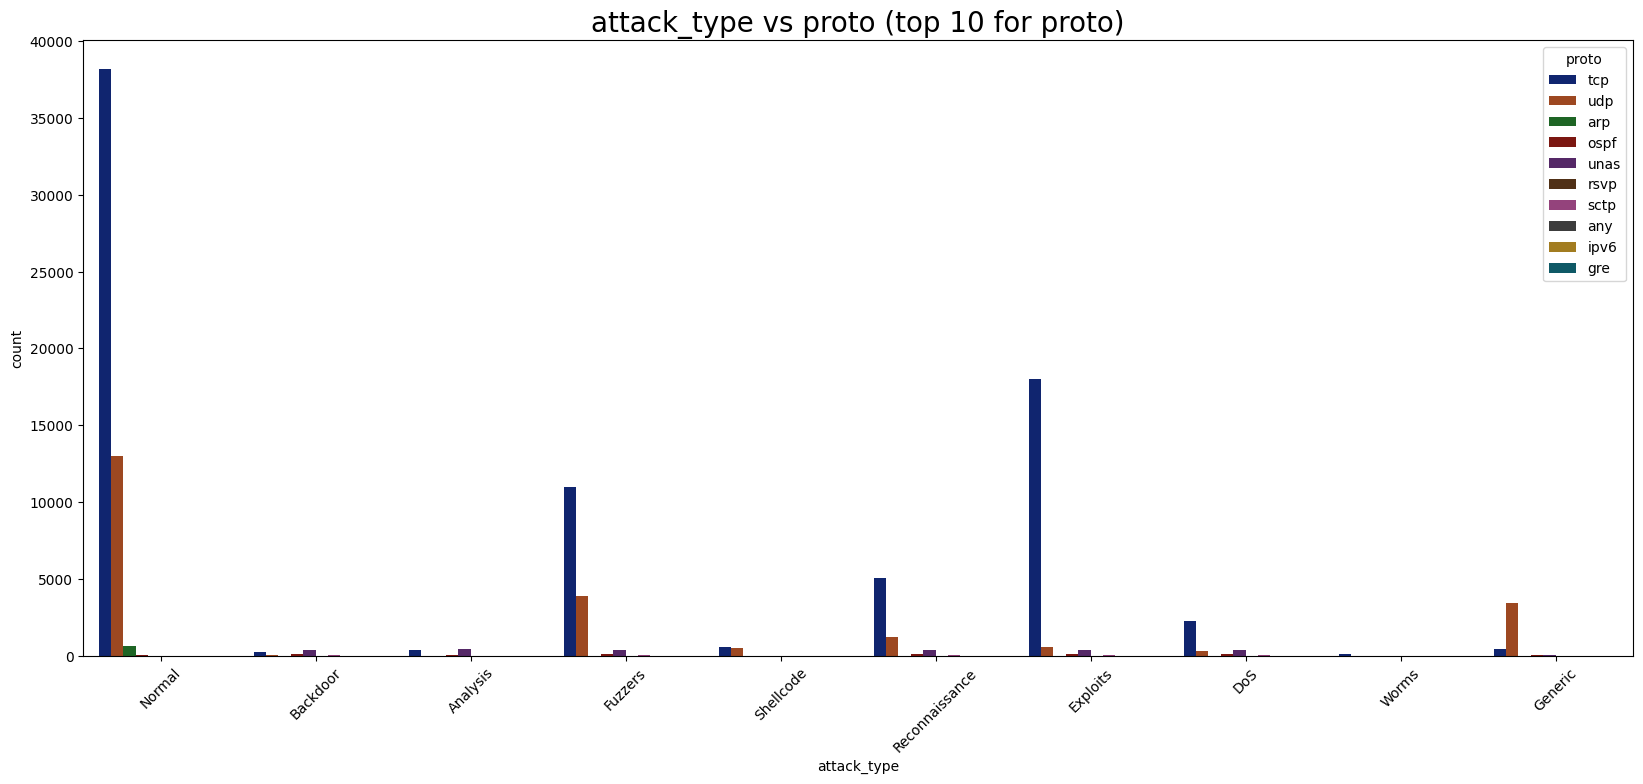

In [17]:
hist_col_vs_col('attack_type', 'proto')

Compare Service vs Attack

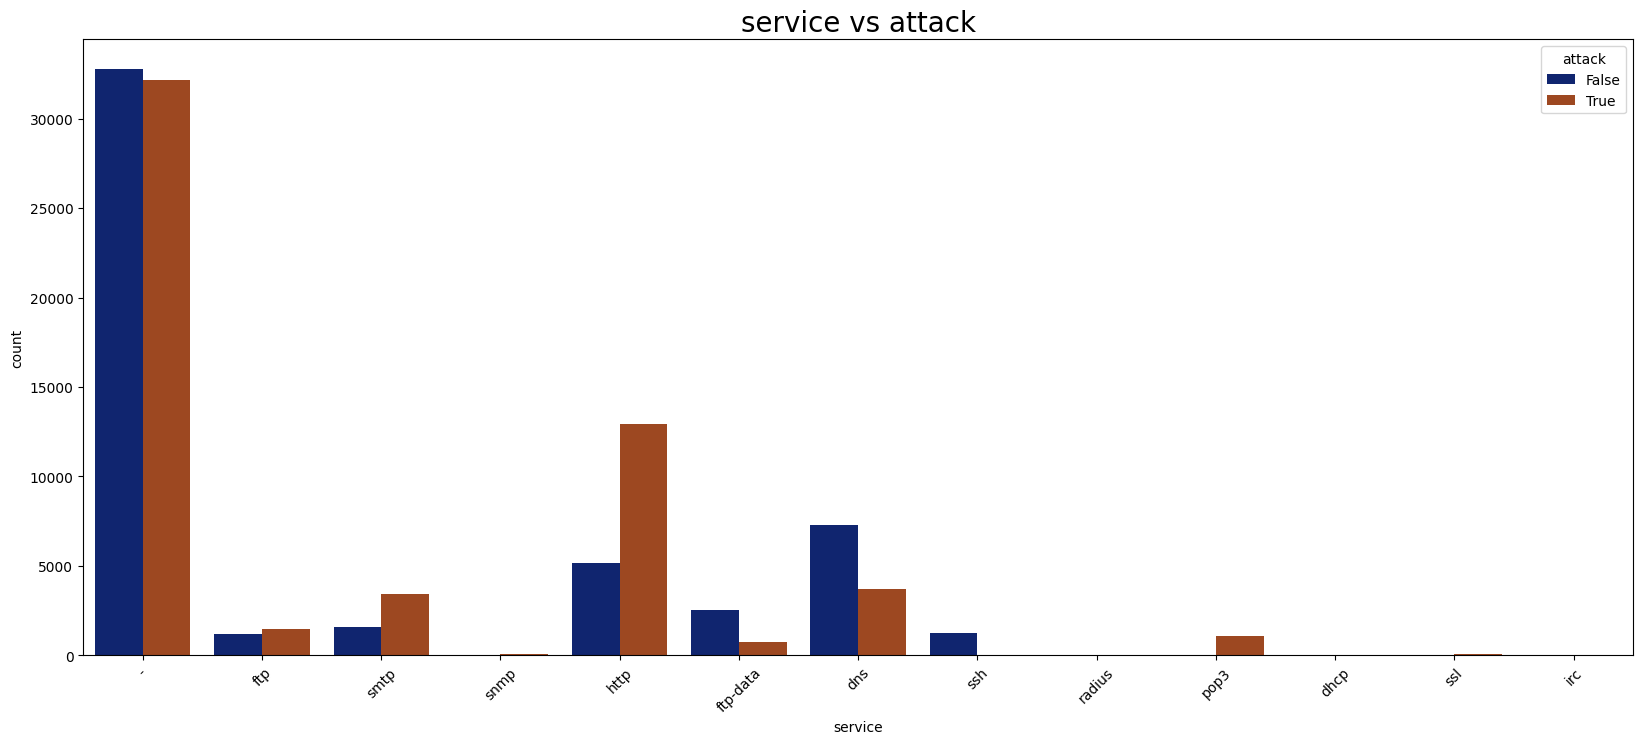

In [18]:
hist_col_vs_col('service', 'attack')

Compare State vs Attack

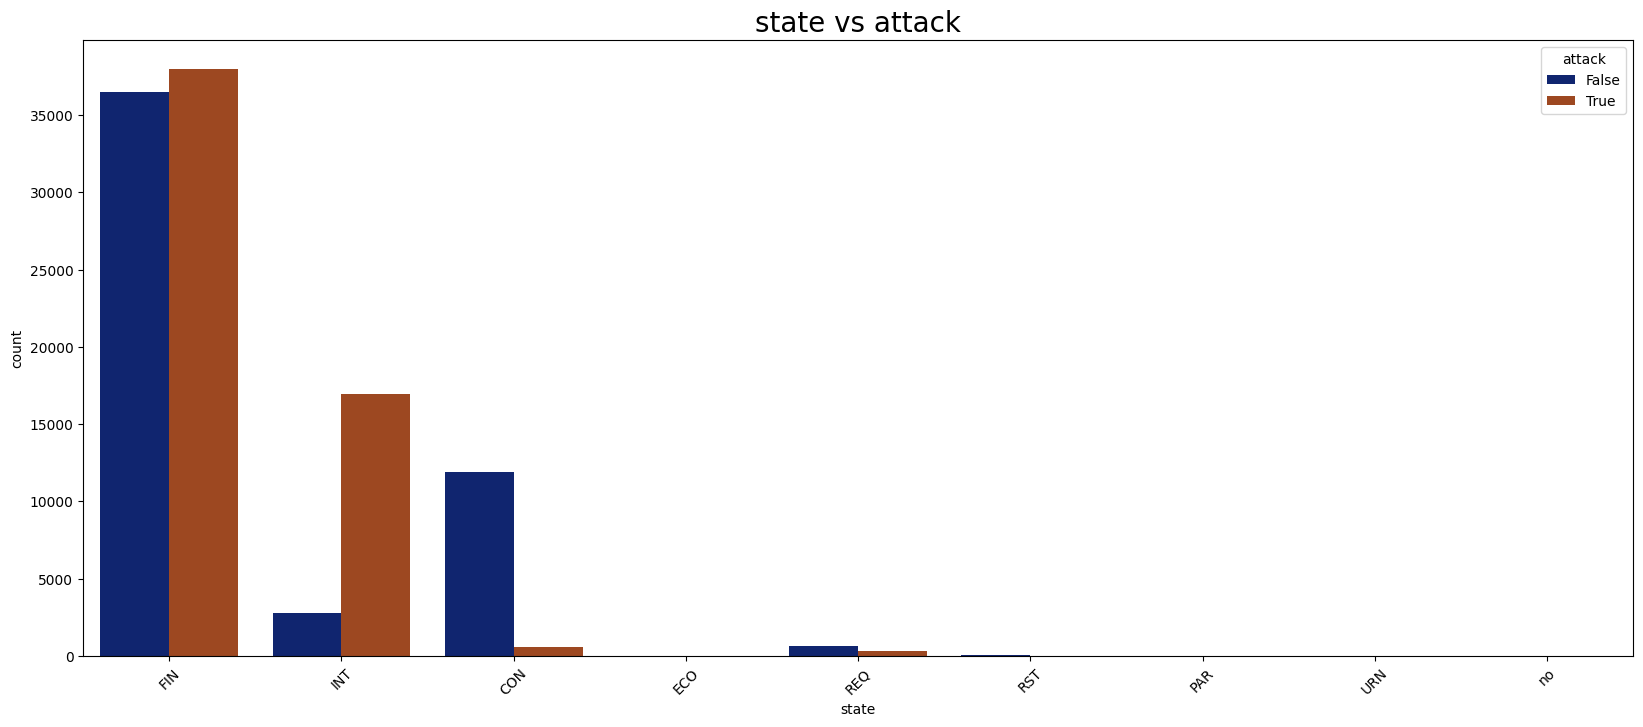

In [19]:
hist_col_vs_col('state', 'attack')

Correlation matrix, useful for finding very correlated features

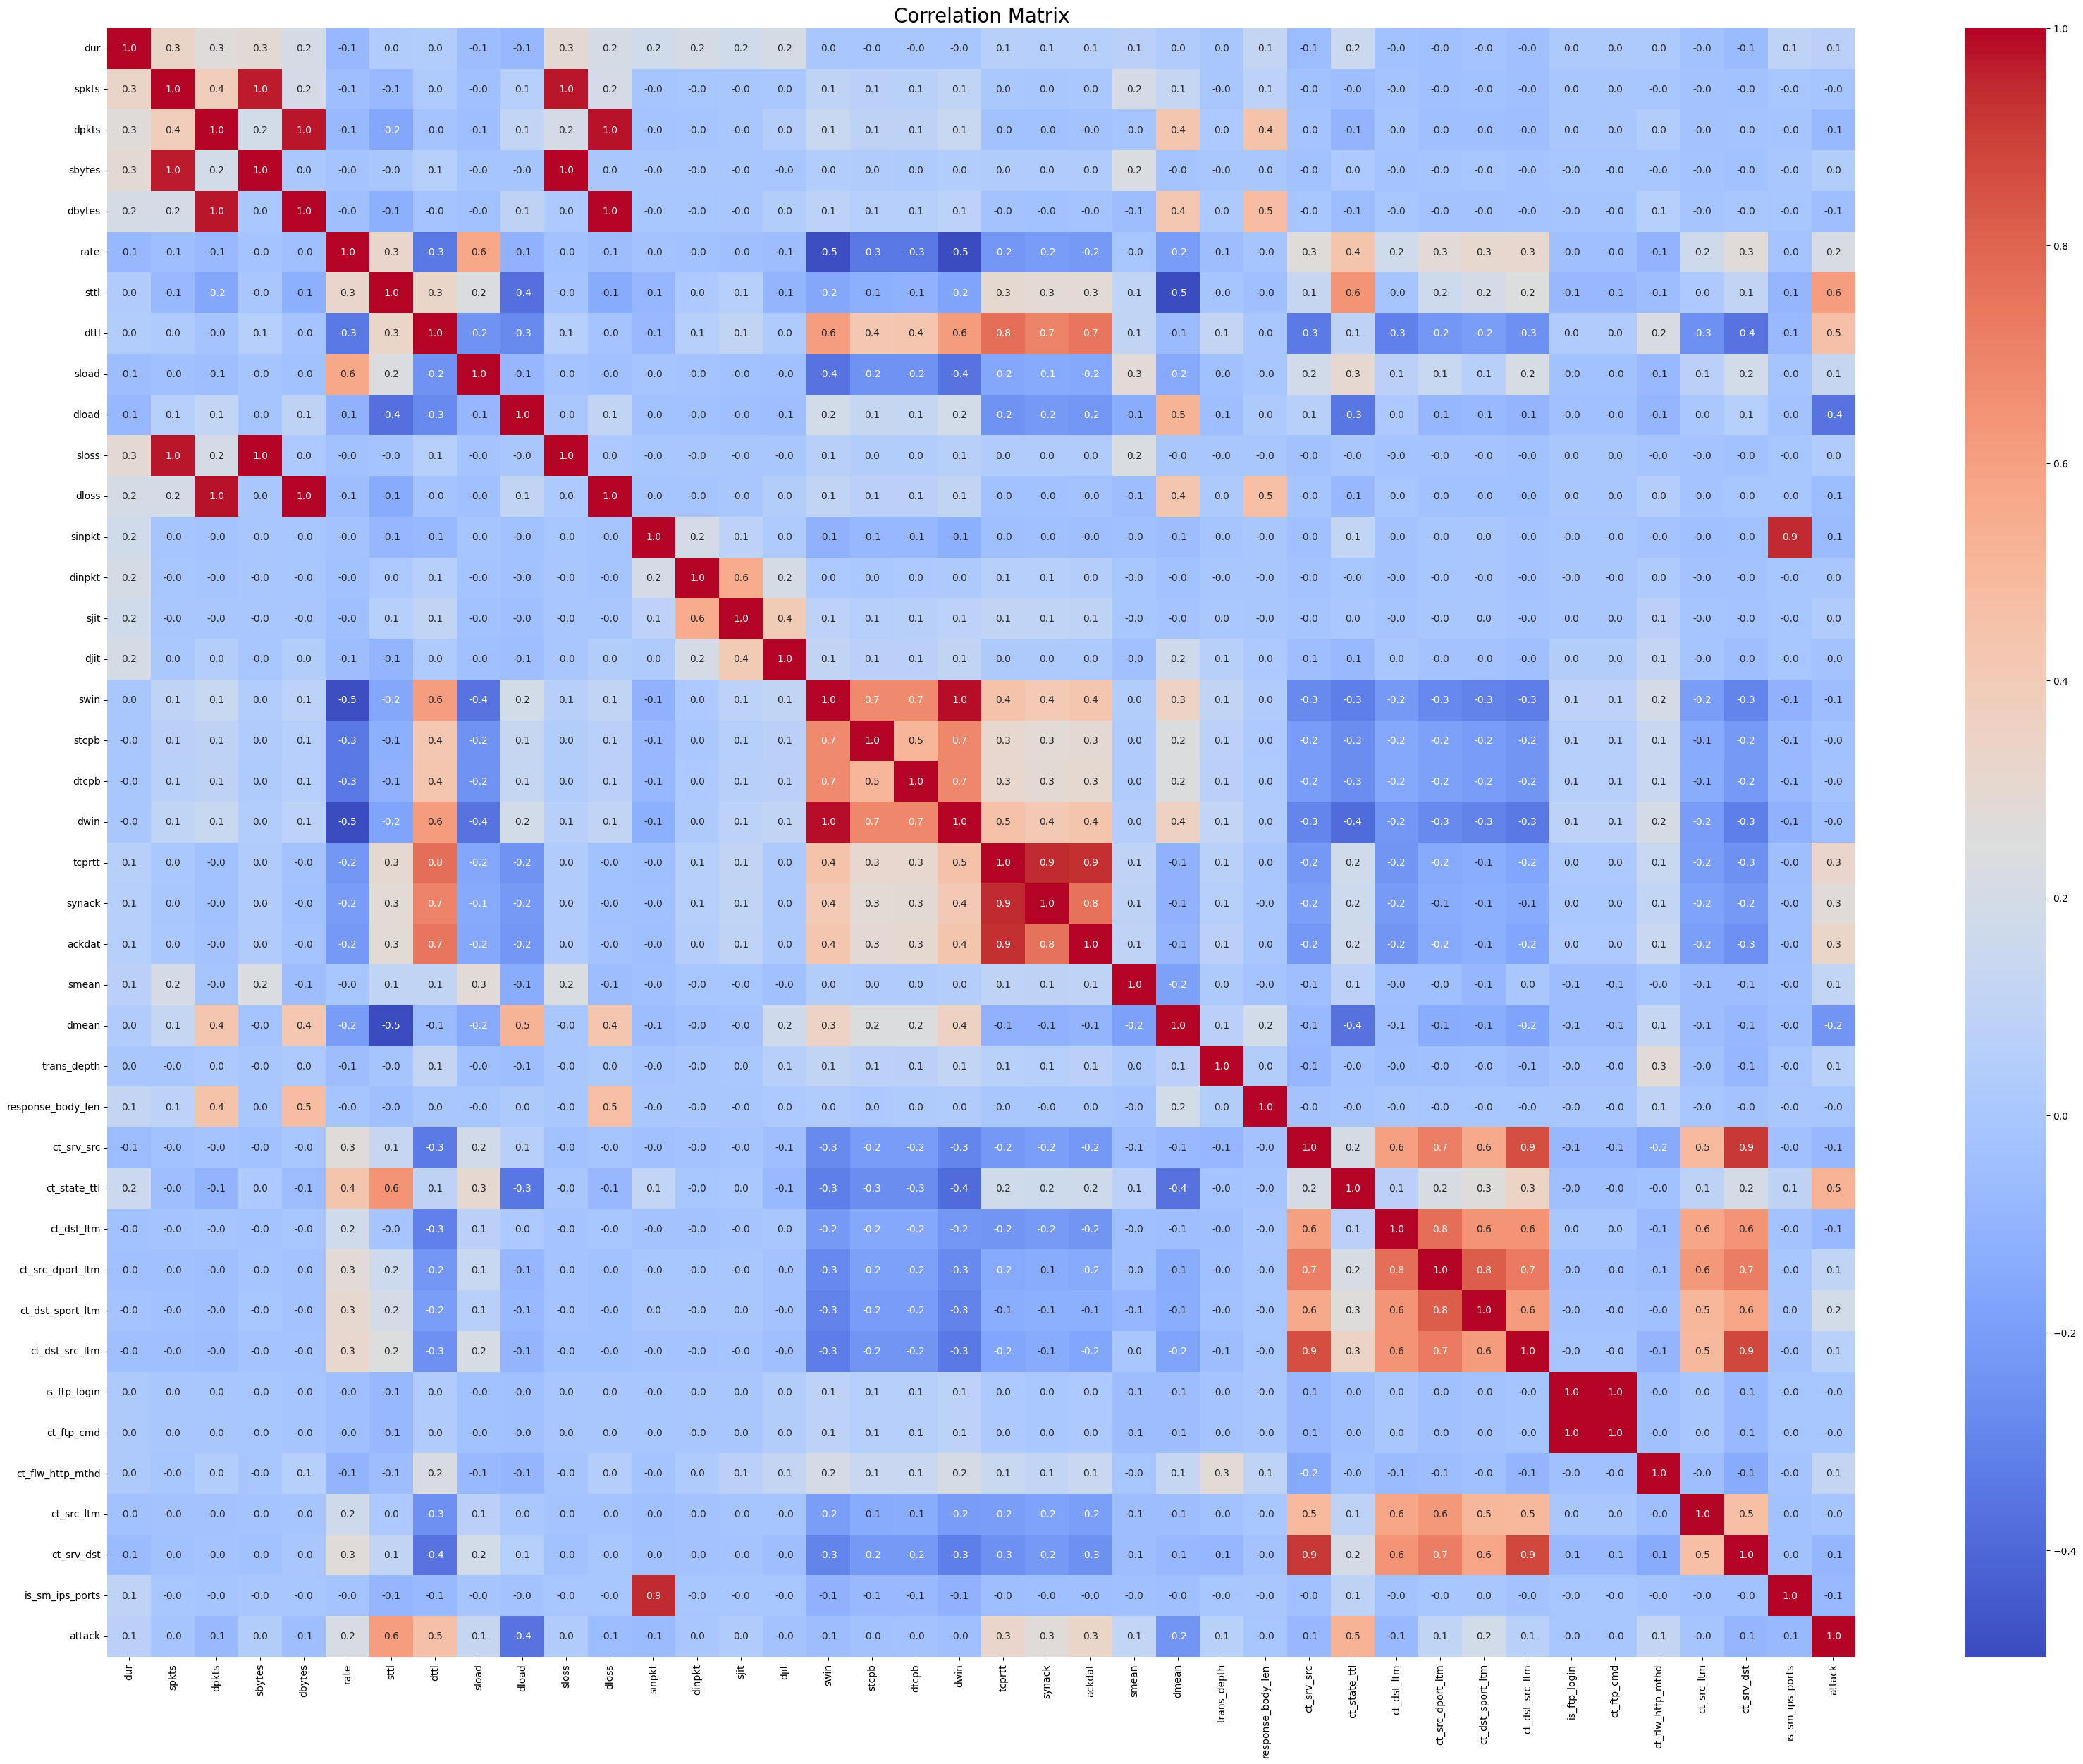

In [20]:
plt.figure(figsize=(40, 30))
correlation_matrix = train_df[train_df.select_dtypes(exclude=['object', 'category']).columns.tolist()].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", annot_kws={"size": 10})
plt.title("Correlation Matrix", fontsize=20)
plt.show()

Compare the subset of most correlated (|corr| > 0.5) features vs Attack

In [21]:
def compare_feature_target(feature_name):
    # Set up the plotting area with only two columns for histogram and violin plot
    _, axes = plt.subplots(1, 2, figsize=(14, 3))

    # Histogram
    sns.histplot(train_df[feature_name], kde=True, ax=axes[0], color="skyblue")
    axes[0].set_title(f"Histogram of {feature_name}", fontsize=20)
    axes[0].set_xlabel(feature_name)

    # Violin plot colored by Attack
    sns.violinplot(data=train_df, x='attack', y=feature_name, hue='attack', ax=axes[1])
    axes[1].set_title(f"Violin Plot of {feature_name} by Attack", fontsize=20)
    axes[1].get_legend().remove()

    plt.tight_layout()
    plt.show()

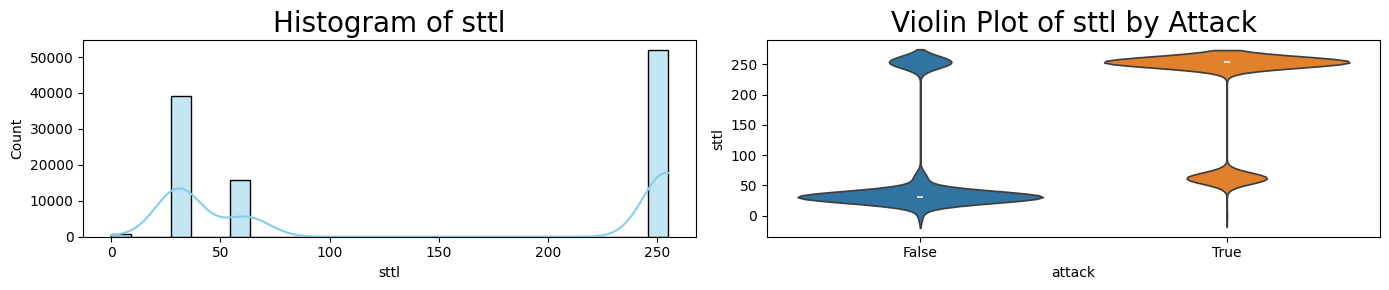

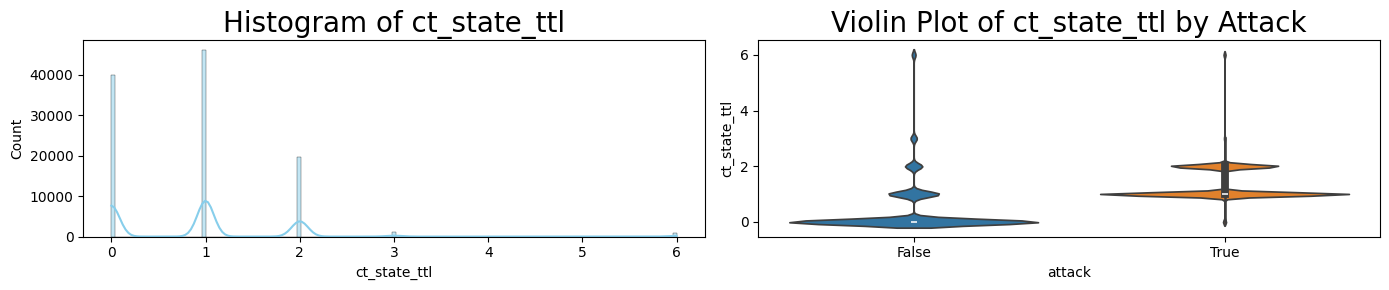

In [22]:
# Filter features with |correlation| > 0.5 w.r.t Attack and compare
target_corr = correlation_matrix['attack'].drop('attack')
for feature in target_corr[abs(target_corr) > 0.5].index.tolist():
    compare_feature_target(feature)